# Exploring the Framingham Dataset: Building a Clinical Cardiovascular Disease (CVD) System


Welcome to this Jupyter Notebook, where we will explore the Framingham dataset to develop a predictive model for Cardiovascular Disease (CVD). Our goal is to build a reliable CVD system that can be used in clinical settings for early intervention and personalised care.

We will begin by exploring the Framingham dataset, analysing its features and identifying any data quality issues. Next, we will apply data cleansing techniques to ensure the accuracy of our model.

After preparing the dataset, we will develop a predictive model using machine learning algorithms. We will evaluate different models and tune their parameters to create a practical CVD system. By the end of this notebook, we aim to provide healthcare professionals with a valuable tool to identify individuals at high risk of developing CVD.

## Exploratory Data Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("frmgham2.csv")

In [4]:
df.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI   
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97  \
1    2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3    6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4    6238    2    237.0   58  108.0   66.0         0      0.0  28.50   

   DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK   
0         0  ...    1         0    8766    6438      6438     6438      8766  \
1         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
3         0  ...    0         0    8766    8766      8766     8766      8766   
4         0  ...    0         0    8766    8766      8766     8766      8766   

   TIMECVD  TIMEDTH  TIMEHYP  
0     6438     8766     8766  
1     6438     8766     8766  
2     8766     8766     8766  
3     8766     8766     8766  
4     8766     8766     8766  

[5 rows x 39 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [5]:
df.shape

(11627, 39)

In [6]:
df.describe()

RANDID           SEX       TOTCHOL           AGE         SYSBP   
count  1.162700e+04  11627.000000  11218.000000  11627.000000  11627.000000  \
mean   5.004741e+06      1.568074    241.162418     54.792810    136.324116   
std    2.900877e+06      0.495366     45.368030      9.564299     22.798625   
min    2.448000e+03      1.000000    107.000000     32.000000     83.500000   
25%    2.474378e+06      1.000000    210.000000     48.000000    120.000000   
50%    5.006008e+06      2.000000    238.000000     54.000000    132.000000   
75%    7.472730e+06      2.000000    268.000000     62.000000    149.000000   
max    9.999312e+06      2.000000    696.000000     81.000000    295.000000   

              DIABP      CURSMOKE       CIGPDAY           BMI      DIABETES   
count  11627.000000  11627.000000  11548.000000  11575.000000  11627.000000  \
mean      83.037757      0.432528      8.250346     25.877349      0.045584   
std       11.660144      0.495448     12.186888      4.102640      0.208589   
min       30.000000      0.000000      0.000000     14.430000      0.000000   
25%       75.000000      0.000000      0.000000     23.095000      0.000000   
50%       82.000000      0.000000      0.000000     25.480000      0.000000   
75%       90.000000      1.000000     20.000000     28.070000      0.000000   
max      150.000000      1.000000     90.000000     56.800000      1.000000   

       ...           CVD      HYPERTEN        TIMEAP        TIMEMI   
count  ...  11627.000000  11627.000000  11627.000000  11627.000000  \
mean   ...      0.249333      0.743270   7241.556893   7593.846736   
std    ...      0.432646      0.436848   2477.780010   2136.730285   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000   6224.000000   7212.000000   
50%    ...      0.000000      1.000000   8766.000000   8766.000000   
75%    ...      0.000000      1.000000   8766.000000   8766.000000   
max    ...      1.000000      1.000000   8766.000000   8766.000000   

           TIMEMIFC       TIMECHD      TIMESTRK       TIMECVD       TIMEDTH   
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000  \
mean    7543.036725   7008.153608   7660.880021   7166.082996   7854.102950   
std     2192.120311   2641.344513   2011.077091   2541.668477   1788.369623   
min        0.000000      0.000000      0.000000      0.000000     26.000000   
25%     7049.500000   5598.500000   7295.000000   6004.000000   7797.500000   
50%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
75%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
max     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   

            TIMEHYP  
count  11627.000000  
mean    3598.956395  
std     3464.164659  
min        0.000000  
25%        0.000000  
50%     2429.000000  
75%     7329.000000  
max     8766.000000  

[8 rows x 39 columns]

In [8]:
df = df.fillna(df.mean())

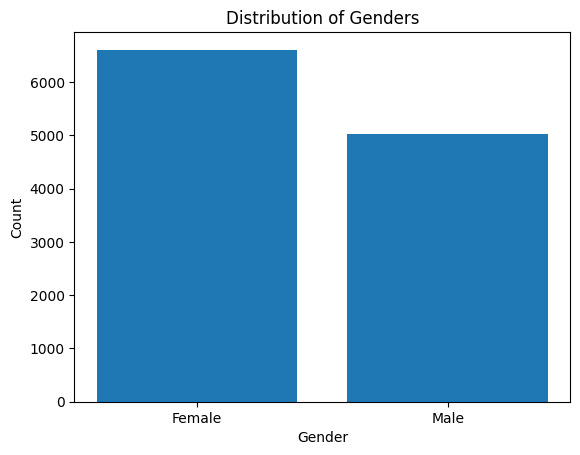

In [9]:
# Map the numerical values to corresponding genders
gender_map = {1: 'Male', 2: 'Female'}
df['SEX'] = df['SEX'].map(gender_map)

# Count the number of occurrences for each gender
gender_counts = df['SEX'].value_counts()

# Plot the distribution of genders
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

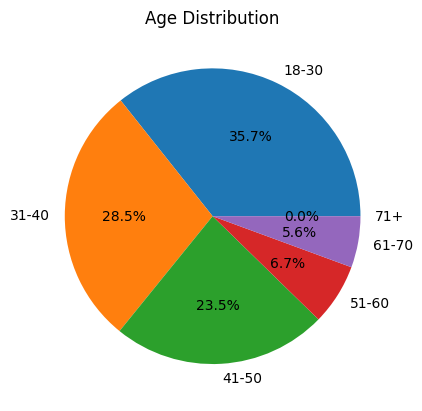

In [10]:
# Filter the 'age' column
age_data = df['AGE'].dropna()

# Define age ranges
age_ranges = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Categorise ages into age ranges
age_category = pd.cut(age_data, bins=[18, 30, 40, 50, 60, 70, float('inf')], labels=age_ranges)

# Count the number of occurrences for each age range
age_counts = age_category.value_counts()

# Age distribution as a pie chart
plt.pie(age_counts, labels=age_ranges, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

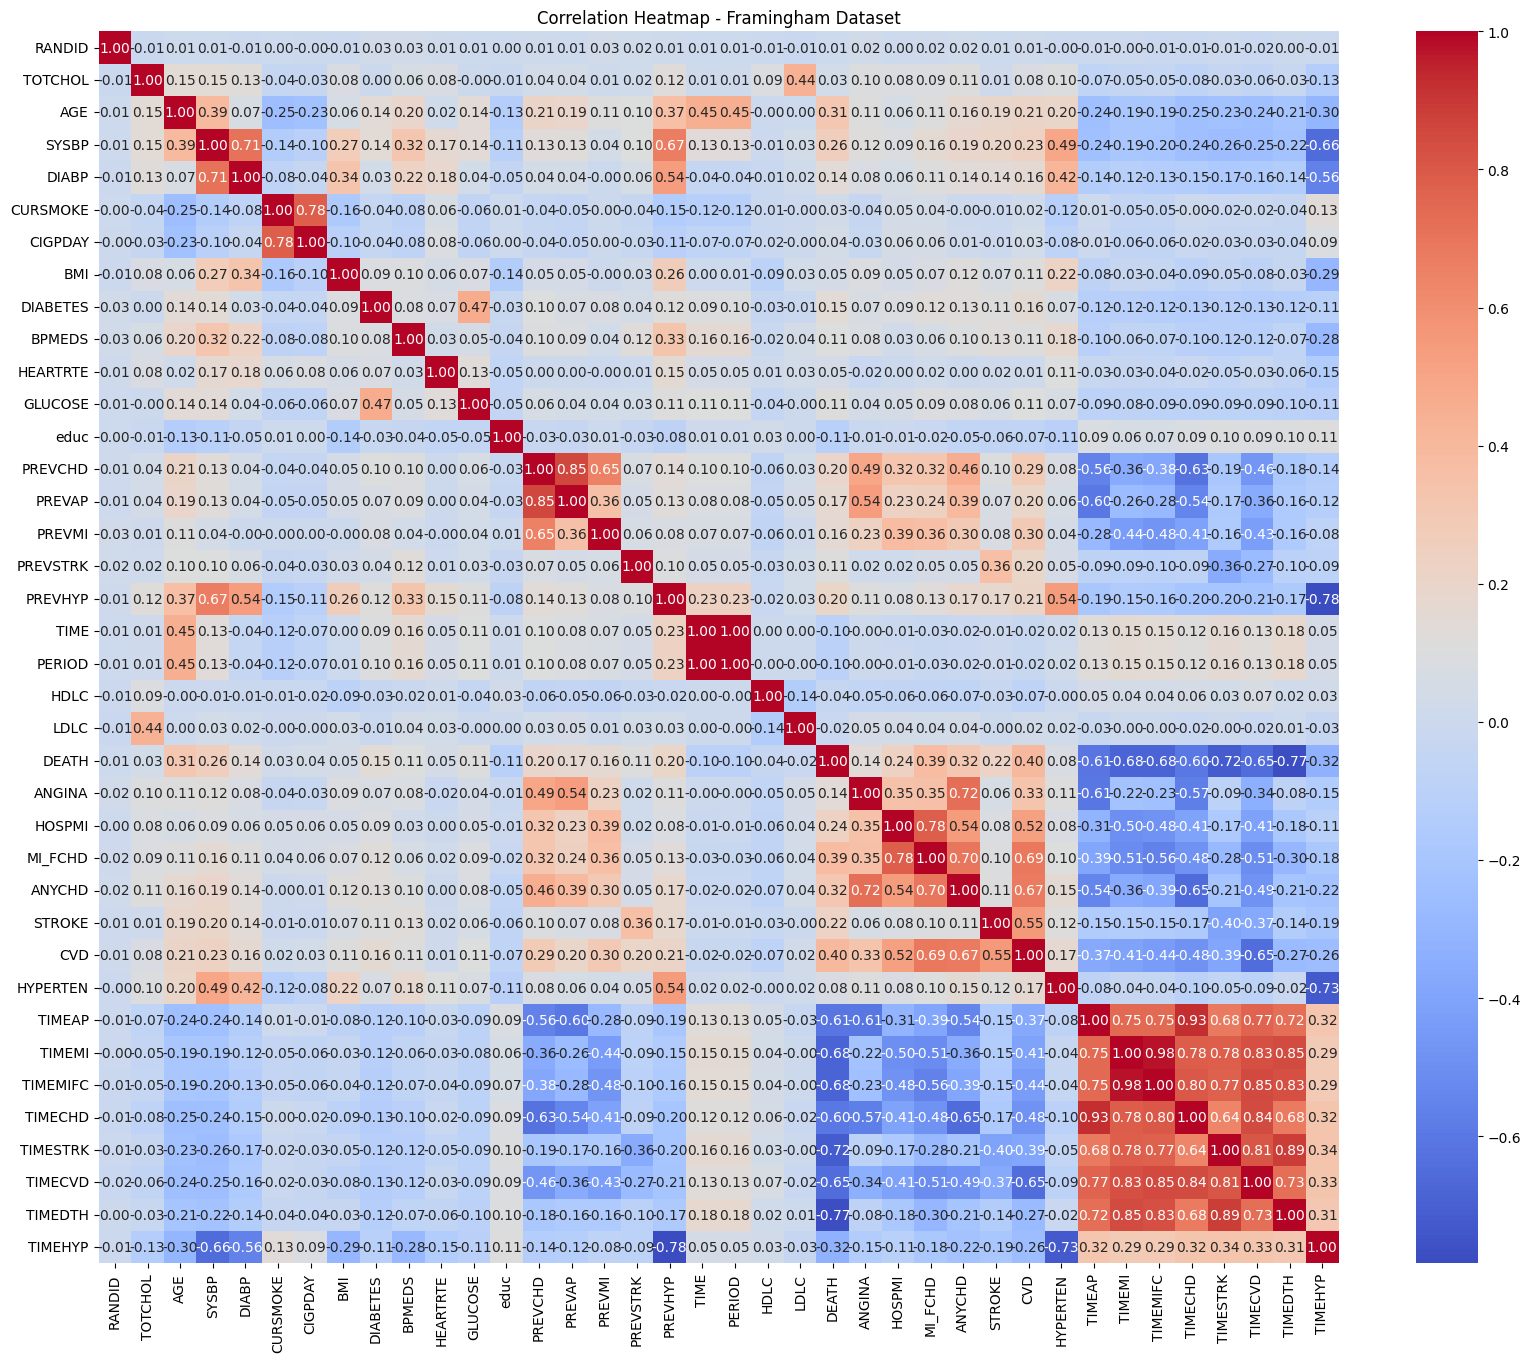

In [11]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Framingham Dataset')
plt.show()


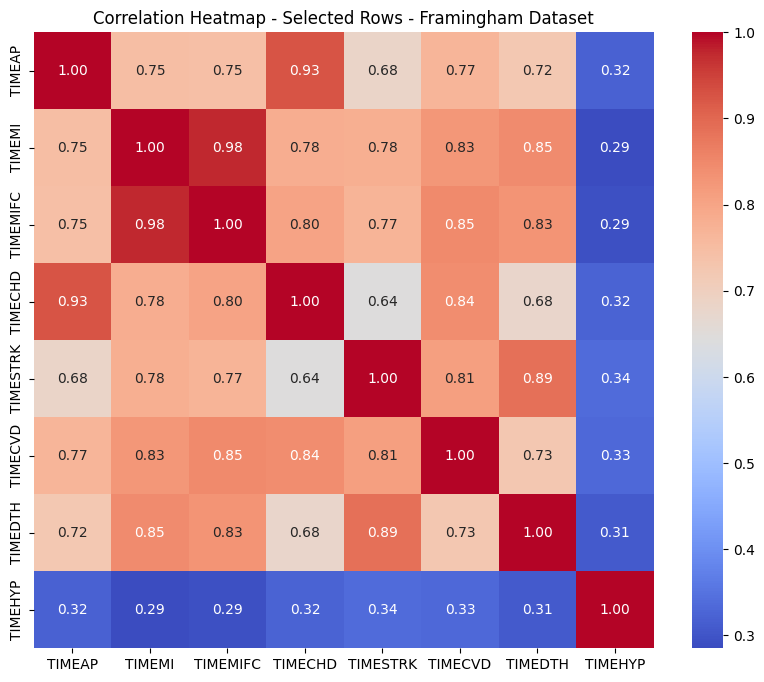

In [12]:
# Select only the specified rows
selected_rows = df.iloc[:, 31:39]
correlation_matrix = selected_rows.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Selected Rows - Framingham Dataset')
plt.show()

In [13]:

high_correlation_cols = correlation_matrix[correlation_matrix > 0.84].sum() > 1
df_fil = df.drop(columns=high_correlation_cols[high_correlation_cols].index)

print(df_fil.head())
df_fil.head()

   RANDID     SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI   
0    2448    Male    195.0   39  106.0   70.0         0      0.0  26.970000  \
1    2448    Male    209.0   52  121.0   66.0         0      0.0  25.877349   
2    6238  Female    250.0   46  121.0   81.0         0      0.0  28.730000   
3    6238  Female    260.0   52  105.0   69.5         0      0.0  29.430000   
4    6238  Female    237.0   58  108.0   66.0         0      0.0  28.500000   

   DIABETES  ...        LDLC  DEATH  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE   
0         0  ...  176.466953      0       0       1        1       1       0  \
1         0  ...  178.000000      0       0       1        1       1       0   
2         0  ...  176.466953      0       0       0        0       0       0   
3         0  ...  176.466953      0       0       0        0       0       0   
4         0  ...  141.000000      0       0       0        0       0       0   

   CVD  HYPERTEN  TIMEHYP  
0    1         0

RANDID     SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI   
0    2448    Male    195.0   39  106.0   70.0         0      0.0  26.970000  \
1    2448    Male    209.0   52  121.0   66.0         0      0.0  25.877349   
2    6238  Female    250.0   46  121.0   81.0         0      0.0  28.730000   
3    6238  Female    260.0   52  105.0   69.5         0      0.0  29.430000   
4    6238  Female    237.0   58  108.0   66.0         0      0.0  28.500000   

   DIABETES  ...        LDLC  DEATH  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE   
0         0  ...  176.466953      0       0       1        1       1       0  \
1         0  ...  178.000000      0       0       1        1       1       0   
2         0  ...  176.466953      0       0       0        0       0       0   
3         0  ...  176.466953      0       0       0        0       0       0   
4         0  ...  141.000000      0       0       0        0       0       0   

   CVD  HYPERTEN  TIMEHYP  
0    1         0     8766  
1    1         0     8766  
2    0         0     8766  
3    0         0     8766  
4    0         0     8766  

[5 rows x 32 columns]

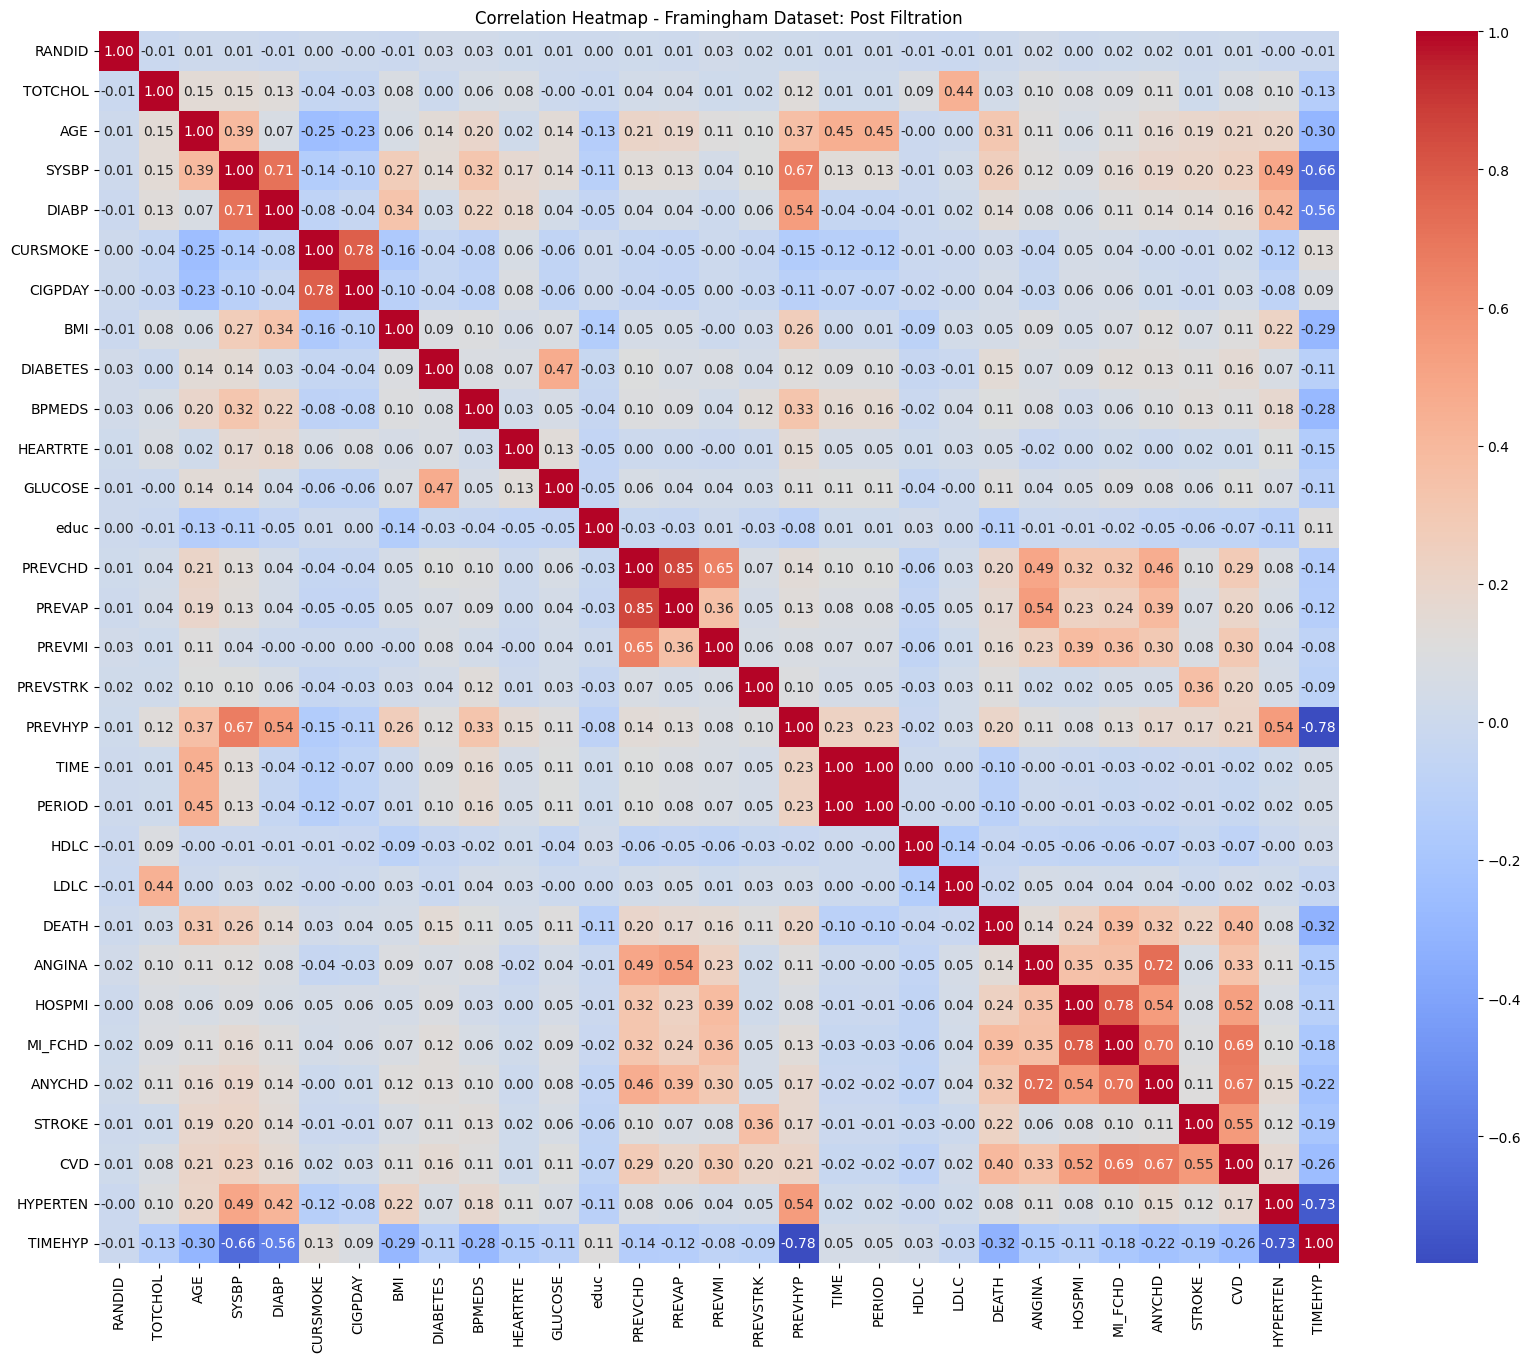

In [14]:

numeric_columns2 = df_fil.select_dtypes(include='number')


correlation_matrix = numeric_columns2.corr()


plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Framingham Dataset: Post Filtration')
plt.show()


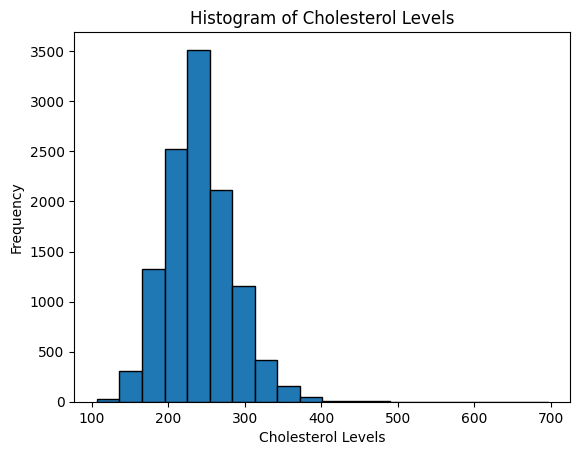

In [15]:

cholesterol_levels = df_fil['TOTCHOL']

# Histogram
plt.hist(cholesterol_levels, bins=20, edgecolor='black')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels')
plt.show()

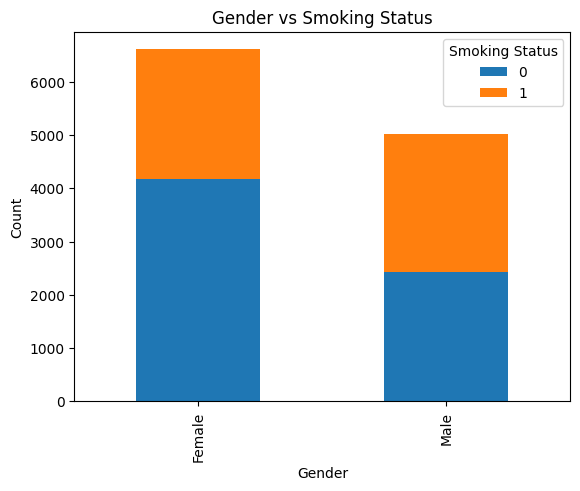

In [16]:

# Bar plot: Gender vs Smoking Status
gender_smoking_counts = df_fil.groupby(['SEX', 'CURSMOKE']).size().unstack()
gender_smoking_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Smoking Status')
plt.legend(title='Smoking Status')
plt.show()


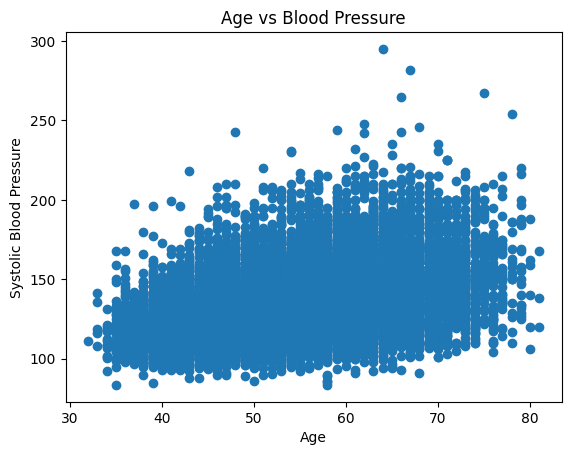

In [17]:

# Scatter plot: Age vs Blood Pressure
age_blood_pressure = df_fil[['AGE', 'SYSBP']]
plt.scatter(age_blood_pressure['AGE'], age_blood_pressure['SYSBP'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()


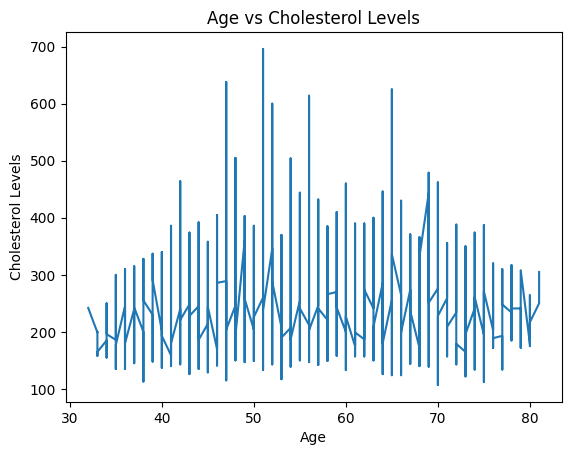

In [18]:

age_chol = df[['AGE', 'TOTCHOL']]

age_chol = age_chol.sort_values('AGE')

plt.plot(age_chol['AGE'], age_chol['TOTCHOL'])
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.title('Age vs Cholesterol Levels')
plt.show()




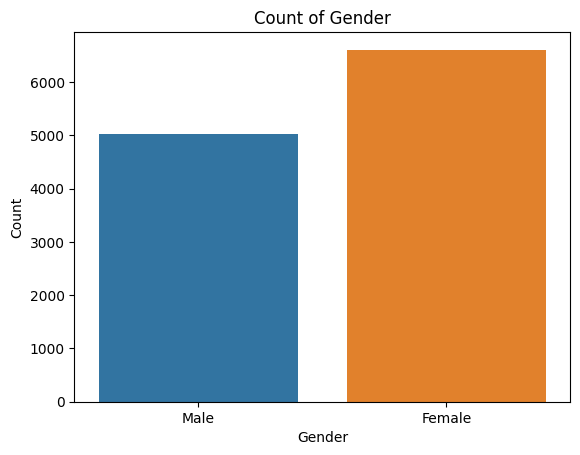

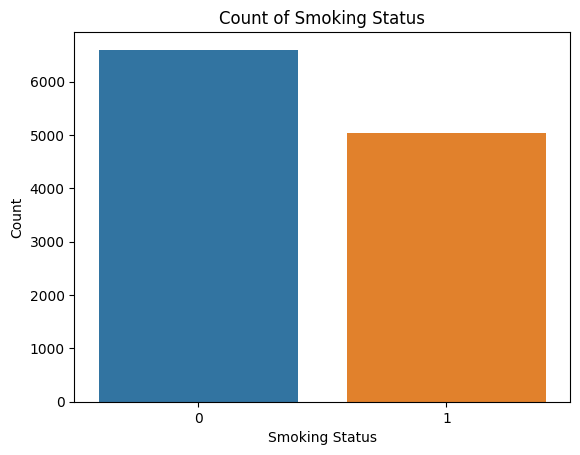

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='SEX', data=df_fil)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

sns.countplot(x='CURSMOKE', data=df_fil)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Count of Smoking Status')
plt.show()


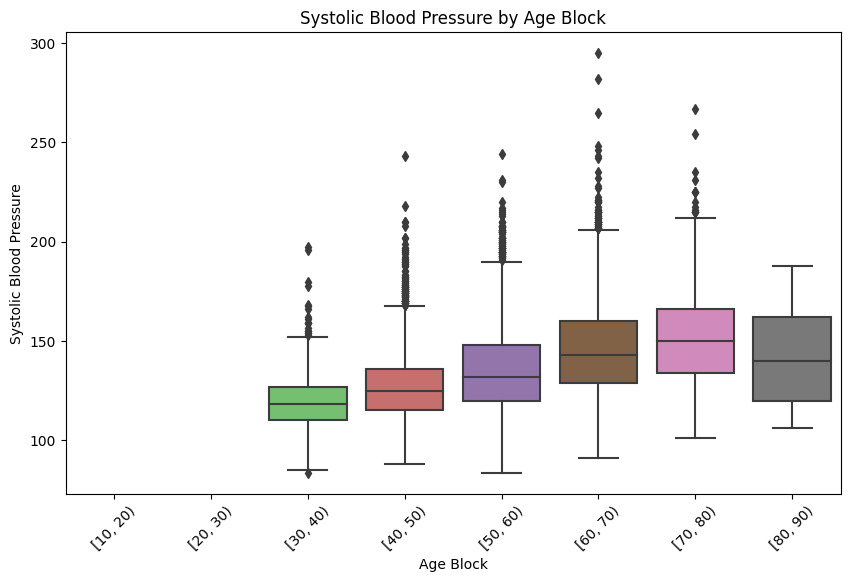

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_agesys = df[['AGE', 'SYSBP']]

df_agesys = df_agesys.dropna()

df_agesys['age_block'] = pd.cut(df_agesys['AGE'], bins=range(10, 100, 10), right=False)

color_palette = 'muted'

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_agesys, x='age_block', y='SYSBP', palette=color_palette)
plt.title('Systolic Blood Pressure by Age Block')
plt.xlabel('Age Block')
plt.ylabel('Systolic Blood Pressure')
plt.xticks(rotation=45)
plt.show()


In [21]:
df.head()

RANDID     SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI   
0    2448    Male    195.0   39  106.0   70.0         0      0.0  26.970000  \
1    2448    Male    209.0   52  121.0   66.0         0      0.0  25.877349   
2    6238  Female    250.0   46  121.0   81.0         0      0.0  28.730000   
3    6238  Female    260.0   52  105.0   69.5         0      0.0  29.430000   
4    6238  Female    237.0   58  108.0   66.0         0      0.0  28.500000   

   DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK   
0         0  ...    1         0    8766    6438      6438     6438      8766  \
1         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
3         0  ...    0         0    8766    8766      8766     8766      8766   
4         0  ...    0         0    8766    8766      8766     8766      8766   

   TIMECVD  TIMEDTH  TIMEHYP  
0     6438     8766     8766  
1     6438     8766     8766  
2     8766     8766     8766  
3     8766     8766     8766  
4     8766     8766     8766  

[5 rows x 39 columns]

           CIGPDAY     SYSBP       AGE     DIABP  CURSMOKE   TOTCHOL   
CIGPDAY   1.000000 -0.102277 -0.226817 -0.035116  0.778115 -0.032780  \
SYSBP    -0.102277  1.000000  0.389010  0.711641 -0.140761  0.146647   
AGE      -0.226817  0.389010  1.000000  0.069258 -0.252655  0.146633   
DIABP    -0.035116  0.711641  0.069258  1.000000 -0.075925  0.127397   
CURSMOKE  0.778115 -0.140761 -0.252655 -0.075925  1.000000 -0.040941   
TOTCHOL  -0.032780  0.146647  0.146633  0.127397 -0.040941  1.000000   
HDLC     -0.021278 -0.005914 -0.004744 -0.010831 -0.011421  0.089846   
LDLC     -0.002828  0.032140  0.004630  0.020640 -0.003924  0.436349   
BMI      -0.102205  0.274063  0.060064  0.336656 -0.164884  0.077977   
GLUCOSE  -0.060634  0.142457  0.141612  0.035420 -0.060385 -0.001955   
DIABETES -0.040579  0.144683  0.137484  0.031810 -0.043479  0.003206   
PREVAP   -0.045633  0.127068  0.193413  0.043511 -0.048570  0.044352   
PREVCHD  -0.035959  0.133859  0.210838  0.040876 -0.043664  0.03

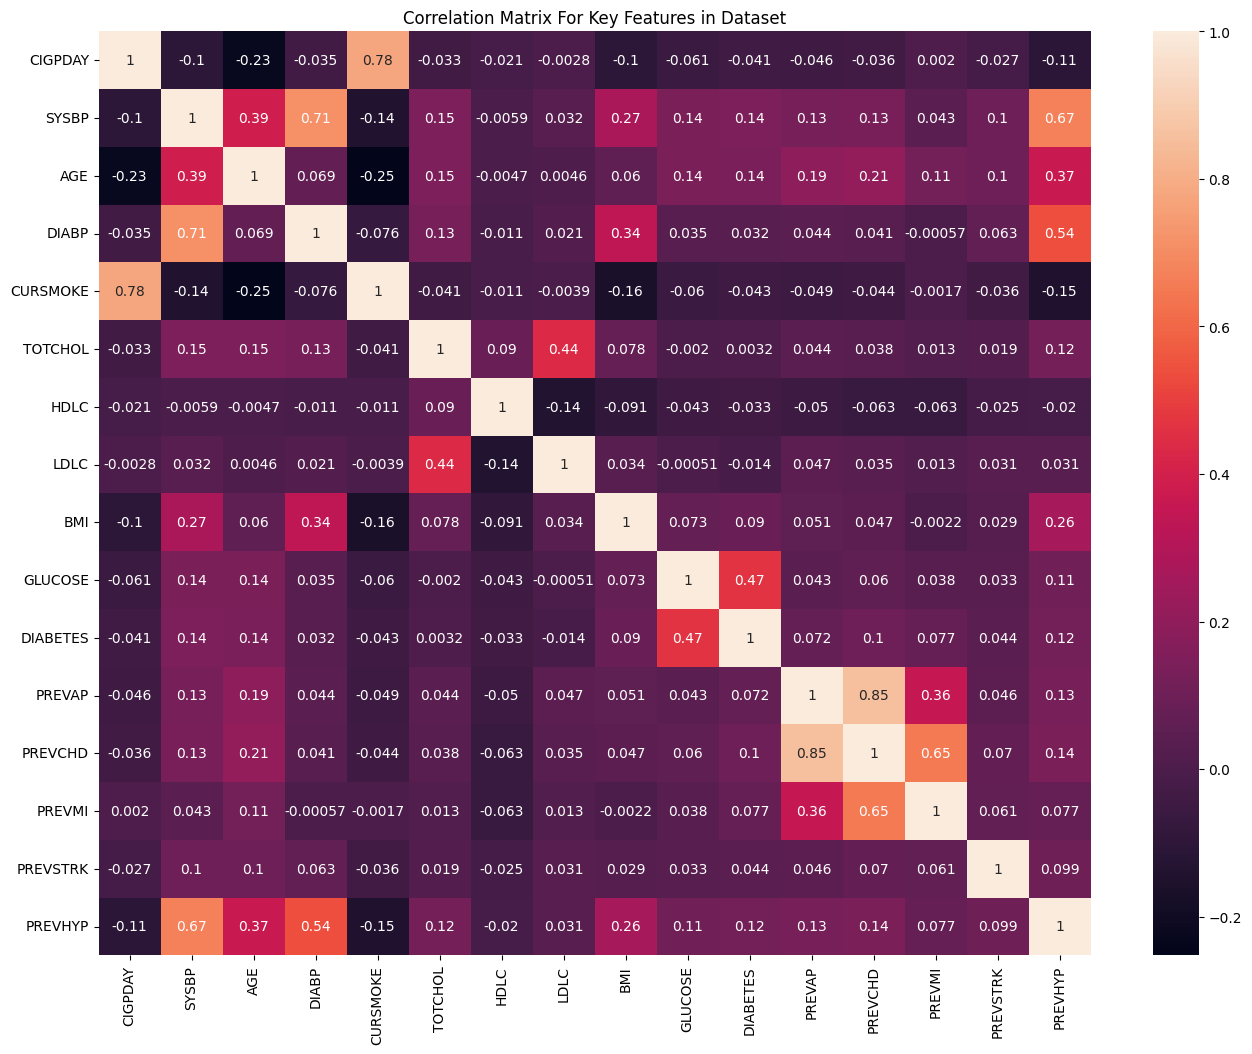

<Figure size 640x480 with 0 Axes>

In [22]:

df_comp = df[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES','PREVAP','PREVCHD', 'PREVMI','PREVSTRK', 'PREVHYP']]

df_comp = df_comp.dropna()


correlation_matrix = df_comp[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES','PREVAP','PREVCHD', 'PREVMI','PREVSTRK', 'PREVHYP']].corr()


print(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title("Correlation Matrix For Key Features in Dataset")
plt.show()
plt.savefig("correlation_heatmap.png")

           CIGPDAY     SYSBP       AGE     DIABP  CURSMOKE   TOTCHOL   
CIGPDAY   1.000000 -0.102277 -0.226817 -0.035116  0.778115 -0.032780  \
SYSBP    -0.102277  1.000000  0.389010  0.711641 -0.140761  0.146647   
AGE      -0.226817  0.389010  1.000000  0.069258 -0.252655  0.146633   
DIABP    -0.035116  0.711641  0.069258  1.000000 -0.075925  0.127397   
CURSMOKE  0.778115 -0.140761 -0.252655 -0.075925  1.000000 -0.040941   
TOTCHOL  -0.032780  0.146647  0.146633  0.127397 -0.040941  1.000000   
HDLC     -0.021278 -0.005914 -0.004744 -0.010831 -0.011421  0.089846   
LDLC     -0.002828  0.032140  0.004630  0.020640 -0.003924  0.436349   
BMI      -0.102205  0.274063  0.060064  0.336656 -0.164884  0.077977   
GLUCOSE  -0.060634  0.142457  0.141612  0.035420 -0.060385 -0.001955   
DIABETES -0.040579  0.144683  0.137484  0.031810 -0.043479  0.003206   

              HDLC      LDLC       BMI   GLUCOSE  DIABETES  
CIGPDAY  -0.021278 -0.002828 -0.102205 -0.060634 -0.040579  
SYSBP    -0.0

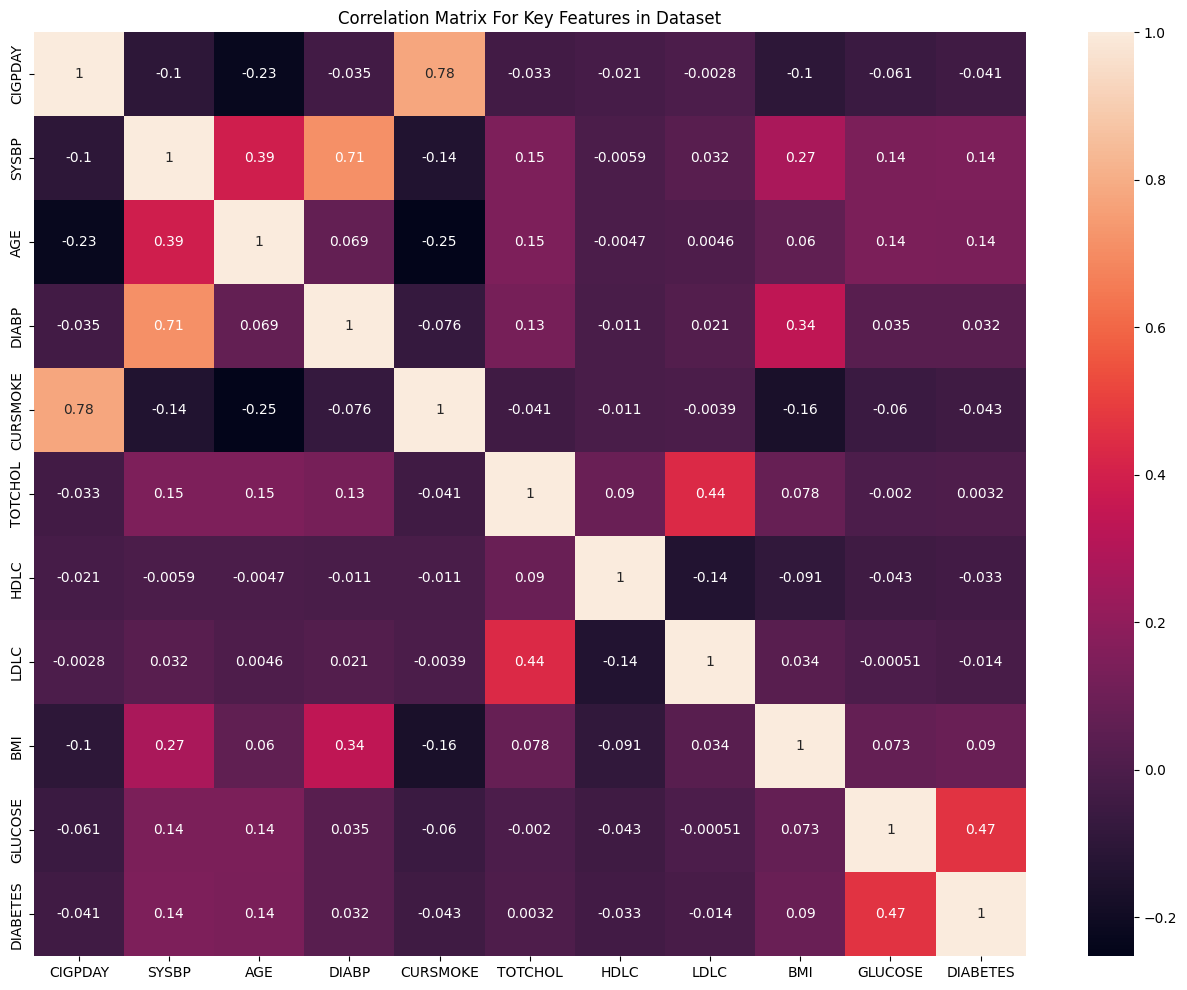

<Figure size 640x480 with 0 Axes>

In [23]:

df_comp = df[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES']]

df_comp = df_comp.dropna()

correlation_matrix = df_comp[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES']].corr()

print(correlation_matrix)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title("Correlation Matrix For Key Features in Dataset")
plt.show()
plt.savefig("correlation_heatmap.png")

In [24]:
df_fil.head()
cat_vars= ['SEX']
df_fil = pd.get_dummies(df_fil, columns = cat_vars)

---

# Application of Modelling

## Classification (Pre-Validation)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [26]:
from sklearn.model_selection import train_test_split
X = df_fil.drop('PREVCHD', axis=1)
y = df_fil['PREVCHD']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [27]:

svm_classifier_pre = SVC(probability=True)
lr_classifier_pre = LogisticRegression()
nb_classifier_pre = GaussianNB()
KNN_pre = KNeighborsClassifier()
XGBClassifier_pre = XGBClassifier()
dt_classifier_pre = DecisionTreeClassifier()



base_classifiers = [('Decision Tree', dt_classifier_pre), ('SVM', svm_classifier_pre),('Naive Bayes', nb_classifier_pre), ('Logistic Regression', lr_classifier_pre),('KNN', KNN_pre)]

for name, classifier in base_classifiers:

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print('Classifier (Pre-Validation):', name)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)
    print("----------------NEXT MODEL---------------")

Classifier (Pre-Validation): Decision Tree
Accuracy: 0.9948409286328461
Confusion Matrix:
[[2135    7]
 [   5  179]]
Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       0.96      0.97      0.97       184

    accuracy                           0.99      2326
   macro avg       0.98      0.98      0.98      2326
weighted avg       0.99      0.99      0.99      2326

----------------NEXT MODEL---------------
Classifier (Pre-Validation): SVM
Accuracy: 0.9208942390369733
Confusion Matrix:
[[2142    0]
 [ 184    0]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2142
           1       0.00      0.00      0.00       184

    accuracy                           0.92      2326
   macro avg       0.46      0.50      0.48      2326
weighted avg       0.85      0.92      0.88      2326

----------------NEXT MODEL---------------


## Classification with Hyper-Parameter Tuning, and No Validation Set


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
}

lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}


nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

classifiers_with_params = [
    ('Decision Trees', dt_classifier_pre, dt_params),
    ('SVM', svm_classifier_pre, svm_params),
    ('Naive Bayes', nb_classifier_pre, nb_params),
    ('Logistic Regression', lr_classifier_pre, lr_params),
    ('KNN', KNN_pre, knn_params)
]


for name, classifier, params in classifiers_with_params:
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    
   
    grid_search.fit(X_train, y_train)
    

    best_classifier = grid_search.best_estimator_
    

    y_pred = best_classifier.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    

    print('Classifier (Post-Validation):', name)
    print('Best Parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)
    print("----------------NEXT MODEL---------------")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classifier (Post-Validation): Decision Trees
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.9978503869303526
Confusion Matrix:
[[2142    0]
 [   5  179]]
Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      0.97      0.99       184

    accuracy                           1.00      2326
   macro avg       1.00      0.99      0.99      2326
weighted avg       1.00      1.00      1.00      2326

----------------NEXT MODEL---------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Classifier (Post-Validation): SVM
Best Parameters: {'C': 0.1, 'gamma': 1}
Accuracy: 0.9208942390369733
Confusion Matrix:
[[2142    0]
 [ 184    0]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2142
           

## Classification with Hyper-Parameter Tuning and XGBoost, and No Validation Set


Fitting 5 folds for each of 4 candidates, totalling 20 fits
---------------- MODEL----------------
Classifier (Post-Validation): Decision Trees
Best Parameters: {'max_depth': 10}
Accuracy: 0.9965606190885641
Confusion Matrix:
[[2139    3]
 [   5  179]]
Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       0.98      0.97      0.98       184

    accuracy                           1.00      2326
   macro avg       0.99      0.99      0.99      2326
weighted avg       1.00      1.00      1.00      2326

Fitting 5 folds for each of 9 candidates, totalling 45 fits
---------------- MODEL----------------
Classifier (Post-Validation): SVM
Best Parameters: {'C': 0.1, 'gamma': 1}
Accuracy: 0.9208942390369733
Confusion Matrix:
[[2142    0]
 [ 184    0]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2142
           1       0.00   

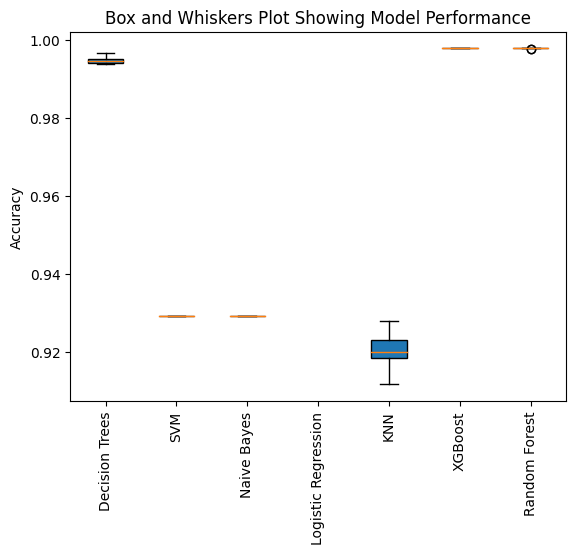

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


rf_classifier_pre = RandomForestClassifier()
dt_classifier_pre = DecisionTreeClassifier()
svm_classifier_pre = SVC(probability=True)
lr_classifier_pre = LogisticRegression()
nb_classifier_pre = GaussianNB()
KNN_pre = KNeighborsClassifier()
XGBClassifier_pre = XGBClassifier()


knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


dt_params = {
    'max_depth': [None, 10, 20, 30]}



rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],

}


lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

classifiers_with_params = [
    ('Decision Trees', dt_classifier_pre, dt_params),
    ('SVM', svm_classifier_pre, svm_params),
    ('Naive Bayes', nb_classifier_pre, nb_params),
    ('Logistic Regression', lr_classifier_pre, lr_params),
    ('KNN', KNN_pre, knn_params),
    ('XGBoost', XGBClassifier_pre, xgb_params),
    ('Random Forest', rf_classifier_pre, rf_params)
]

cv_results_dict = {}

for name, classifier, params in classifiers_with_params:
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    
 
    grid_search.fit(X_train, y_train)
    

    best_classifier = grid_search.best_estimator_
    
   
    y_pred = best_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
   
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cv_results_dict[name] = grid_search.cv_results_['mean_test_score']
    
   
    print("---------------- MODEL----------------")
    print('Classifier (Post-Validation):', name)
    print('Best Parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)


plt.boxplot(cv_results_dict.values(), vert=True, patch_artist=True)
plt.xticks(range(1, len(cv_results_dict.keys()) + 1), cv_results_dict.keys(), rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Box and Whiskers Plot Showing Model Performance')
plt.show()

## Classification with Validation Set (10%)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier


In [27]:

X_chd = df_fil.drop('PREVCHD', axis=1)
Y_chd = df_fil['PREVCHD']

# Split the data into 80% training + validation set and 20% testing set
X_train_val_chd, X_test_chd, y_train_val_chd, y_test_chd = train_test_split(X_chd, Y_chd, test_size=0.2, random_state=42)

# Further split the 80% training + validation set into 70% training and 10% validation
X_train_chd, X_val_chd, y_train_chd, y_val_chd = train_test_split(X_train_val_chd, y_train_val_chd, test_size=0.125, random_state=42)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
---------------- MODEL----------------
Classifier (Post-Validation): Decision Trees
Best Parameters: {'max_depth': 10}
Accuracy: 0.9974204643164231
Confusion Matrix:
[[2141    1]
 [   5  179]]
Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       0.99      0.97      0.98       184

    accuracy                           1.00      2326
   macro avg       1.00      0.99      0.99      2326
weighted avg       1.00      1.00      1.00      2326

Fitting 5 folds for each of 9 candidates, totalling 45 fits
---------------- MODEL----------------
Classifier (Post-Validation): SVM
Best Parameters: {'C': 0.1, 'gamma': 1}
Accuracy: 0.9208942390369733
Confusion Matrix:
[[2142    0]
 [ 184    0]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2142
           1       0.00   

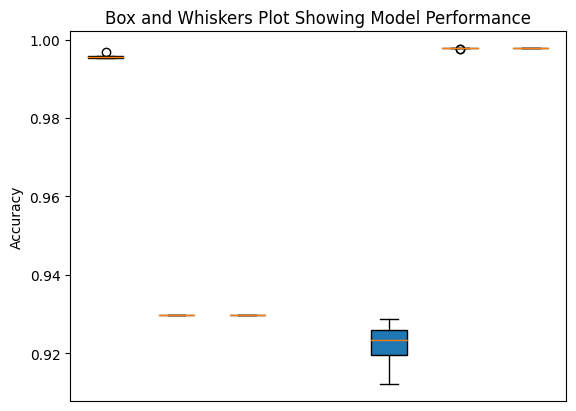

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC(probability=True)
lr_classifier = LogisticRegression()
nb_classifier = GaussianNB()
KNN = KNeighborsClassifier()
XGBClassifier = XGBClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_params = {
    'max_depth': [None, 10, 20, 30]
}


rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
}


lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

classifiers_with_params = [
    ('Decision Trees', dt_classifier, dt_params),
    ('SVM', svm_classifier, svm_params),
    ('Naive Bayes', nb_classifier, nb_params),
    ('Logistic Regression', lr_classifier, lr_params),
    ('KNN', KNN, knn_params),
    ('XGBoost', XGBClassifier, xgb_params),
    ('Random Forest', rf_classifier, rf_params)
]


cv_results_dict_val = {}
for name, classifier, params in classifiers_with_params:
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_chd, y_train_chd)
    best_classifier = grid_search.best_estimator_
    y_pred_chd = best_classifier.predict(X_test_chd)
    accuracy = accuracy_score(y_test_chd, y_pred_chd)
    cm = confusion_matrix(y_test_chd, y_pred_chd)
    report = classification_report(y_test_chd, y_pred_chd)
    cv_results_dict_val[name] = grid_search.cv_results_['mean_test_score']
    print("---------------- MODEL----------------")
    print('Classifier (Post-Validation):', name)
    print('Best Parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)
    
plt.boxplot(cv_results_dict_val.values(), vert=True, patch_artist=True)
plt.xticks(range(1, len(cv_results_dict.keys()) + 1), cv_results_dict.keys(), rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Box and Whiskers Plot Showing Model Performance')
plt.show()


## Classification with Validation Set and Bootstrap Aggregation

Fitting 5 folds for each of 4 candidates, totalling 20 fits
---------------- MODEL----------------
Classifier (Post-Validation): Decision Trees
Best Parameters: {'max_depth': 10}
Accuracy: 0.9974204643164231
Confusion Matrix:
[[2142    0]
 [   6  178]]
Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      0.97      0.98       184

    accuracy                           1.00      2326
   macro avg       1.00      0.98      0.99      2326
weighted avg       1.00      1.00      1.00      2326

Fitting 5 folds for each of 9 candidates, totalling 45 fits
---------------- MODEL----------------
Classifier (Post-Validation): SVM
Best Parameters: {'C': 0.1, 'gamma': 1}
Accuracy: 0.9208942390369733
Confusion Matrix:
[[2142    0]
 [ 184    0]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2142
           1       0.00   

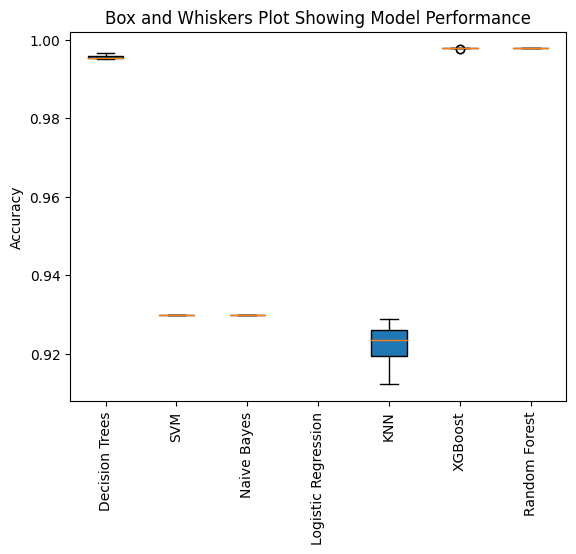

In [30]:
from sklearn.ensemble import BaggingClassifier  # Import this
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

cv_results_dict_val = {}
cv_results_dict = {}  

for name, classifier, params in classifiers_with_params:
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_chd, y_train_chd)
    best_classifier = grid_search.best_estimator_
    bagging_classifier = BaggingClassifier(base_estimator=best_classifier, n_estimators=10, random_state=42)
    bagging_classifier.fit(X_train_chd, y_train_chd)
    y_pred_chd = bagging_classifier.predict(X_test_chd)
    accuracy = accuracy_score(y_test_chd, y_pred_chd)
    cm = confusion_matrix(y_test_chd, y_pred_chd)
    report = classification_report(y_test_chd, y_pred_chd)
    cv_results_dict_val[name] = grid_search.cv_results_['mean_test_score']
    cv_results_dict[name] = {'Accuracy': accuracy, 'Confusion Matrix': cm, 'Report': report}
    print("---------------- MODEL----------------")
    print('Classifier (Post-Validation):', name)
    print('Best Parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)
plt.boxplot(cv_results_dict_val.values(), vert=True, patch_artist=True)
plt.xticks(range(1, len(cv_results_dict.keys()) + 1), cv_results_dict.keys(), rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Box and Whiskers Plot Showing Model Performance')
plt.show()


In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
trained_classifiers = []

for name, classifier, params in classifiers_with_params:
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_chd, y_train_chd)
    best_classifier = grid_search.best_estimator_
    trained_classifiers.append((name, best_classifier))

stacking_classifier = StackingClassifier(estimators=trained_classifiers, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train_chd, y_train_chd)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


StackingClassifier(estimators=[('Decision Trees',
                                DecisionTreeClassifier(max_depth=10)),
                               ('SVM', SVC(C=0.1, gamma=1, probability=True)),
                               ('Naive Bayes', GaussianNB()),
                               ('Logistic Regression',
                                LogisticRegression(C=0.1)),
                               ('KNN',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=9)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_b...
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('Random Forest',
                                RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression())

In [58]:

y_pred_stacking = stacking_classifier.predict(X_test_chd)
accuracy_stacking = accuracy_score(y_test_chd, y_pred_stacking)
cm_stacking = confusion_matrix(y_test_chd, y_pred_stacking)
report_stacking = classification_report(y_test_chd, y_pred_stacking)
print("---------------- STACKING MODEL ----------------")
print('Accuracy:', accuracy_stacking)
print('Confusion Matrix:')
print(cm_stacking)
print('Classification Report:')
print(report_stacking)


---------------- STACKING MODEL ----------------
Accuracy: 0.9974204643164231
Confusion Matrix:
[[2142    0]
 [   6  178]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      0.97      0.98       184

    accuracy                           1.00      2326
   macro avg       1.00      0.98      0.99      2326
weighted avg       1.00      1.00      1.00      2326

